<a href="https://colab.research.google.com/github/eeqilim/lung-cancer-prediction/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Application of Discrete Probability in Lung Cancer Prediction**

The project predicts lung cancer using machine learning models, specifically Gaussian Naive Bayes and Logistic Regression, along with a neural network using TensorFlow and PyTorch.

**Here's a detailed explanation of the project:**

1. Data Cleaning and Preprocessing:
- The dataset is checked for duplicate rows using the drop_duplicates() method, and any duplicate data is eliminated from the DataFrame.
- Data is adjusted and stored in the 'dataset_new' DataFrame, where each element is mapped according to the specified maper dictionary, and the "AGE" feature is retained for analysis.

2. Data Splitting and Standardization:
- The 'dataset_new' DataFrame is split into features (x) and target (y), where 'LUNG_CANCER' is the target variable.
- Features (x) are standardized using StandardScaler() from scikit-learn, which scales the features to have mean=0 and standard deviation=1.

3. Model Training and Evaluation:
- The standardized features and target are split into training and testing sets using train_test_split() from scikit-learn with a test size of 25%.
- **TensorFlow:** A neural network model is defined using TensorFlow's Keras API. The model architecture includes an input layer with the number of features, a hidden layer with 64 units and ReLU activation, and an output layer with a single unit and sigmoid activation for binary classification. The model is compiled with the 'adam' optimizer and 'binary_crossentropy' loss function.
- **PyTorch:** Similarly, a neural network model (LungCancerModel) is implemented using PyTorch's nn.Module. The model architecture comprises an input layer (fc1), a hidden layer (fc2) with 64 units, ReLU activation (relu), and an output layer (fc2) with sigmoid activation (sigmoid) for binary classification. The model is trained using the binary cross-entropy loss (BCELoss) and optimized with the Adam optimizer.
- **Gaussian Naive Bayes and Logistic Regression:** Both models are trained and evaluated using the same training and testing sets. Confusion matrices and classification reports are generated for each model to assess performance.

4. Evaluation and Comparison:
- After training, the performance of each model is evaluated using the test dataset.
- For TensorFlow, the test accuracy and loss metrics are computed using model.evaluate() to assess the model's performance.
- For PyTorch, the model is evaluated on the test data (xTestTensor, yTestTensor), and the test loss and accuracy are calculated.
- The use of both TensorFlow and PyTorch enables a comparative analysis of model performance, providing insights into differences in accuracy and efficiency between the two frameworks.


**Import Libraries and Dataset**

In [360]:
import pandas as pd
import matplotlib.pyplot as plt

In [361]:
dataset = pd.read_csv('survey lung cancer.csv')

**Overview of the data**

In [362]:
dataset.shape # num of rows, num of columns

(309, 16)

In [363]:
dataset.head() # Display first 5 of the dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [364]:
dataset.info() # Summary of the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Data Cleaning**

In [365]:
dataset = dataset.drop_duplicates() # Eliminate any duplicate data

In [366]:
dataset.shape

(276, 16)

In [367]:
# Mapping for categorical variables
maper = {"M": 1, "F": 0, 1: 0, 2: 1, "YES": 1, "NO": 0}
dataset = dataset.copy()

# Apply maper to each element in the DataFrame
dataset_new = dataset.applymap(lambda x: maper.get(x))
dataset_new["AGE"] = dataset["AGE"]

In [368]:
dataset_new # Display the transformed DataFrame

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [369]:
dataset_new.info() # Summary of dataframe after data cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


In [370]:
dataset_new.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data Visualization**

In [371]:
import seaborn as sns

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

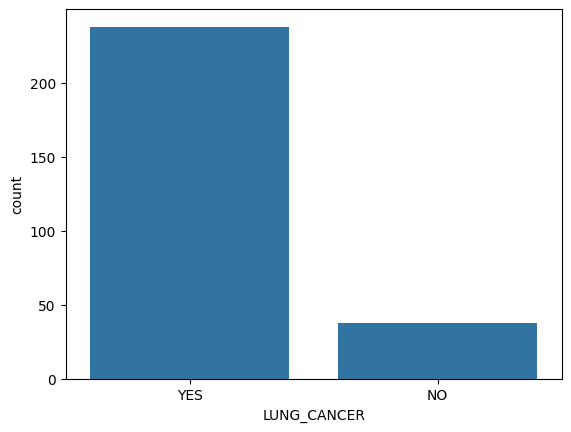

In [372]:
sns.countplot(x ='LUNG_CANCER',data = dataset) # Count plot to check wheather or not the dataset is balanced

**NOTE:** Total count of participants who do not have lung cancer is far less than participants who do have have lung cancer, which indicates that the data is imbalanced.

# Scikit-learn

**NOTE:** Scikit-learn, often referred to as sklearn, is a popular open-source machine learning library for Python.

**Here are some key functionalities and features of scikit-learn:**

1. Machine Learning Algorithms: Scikit-learn offers a comprehensive suite of machine learning algorithms, including supervised learning (e.g., regression, classification), unsupervised learning (e.g., clustering, dimensionality reduction), and semi-supervised learning.
2. Data Preprocessing: It provides various data preprocessing techniques, such as feature scaling, data normalization, imputation of missing values, and encoding categorical variables.
3. Model Selection and Evaluation: Scikit-learn provides tools for model selection, including data splitting for training and testing, cross-validation, and hyperparameter tuning. It also offers metrics for evaluating model performance, such as accuracy, precision, recall, F1-score, and more.
4. Feature Selection: Sklearn provides methods for feature selection, allowing you to choose the most relevant features for your model and eliminate irrelevant or redundant ones.
5. Pipeline Building: It enables the creation of data processing pipelines, where data goes through a sequence of transformations before being fed into a machine learning model. This simplifies the process of building complex workflows.
6. Integration with NumPy and Pandas: Sklearn seamlessly integrates with NumPy and Pandas, making it easy to work with data in these formats.
7. Ensemble Methods: It includes ensemble methods such as random forests, gradient boosting, and voting classifiers, which combine multiple models to improve overall predictive performance.
8. Support for Various Data Types: Sklearn can handle both dense and sparse data arrays, making it suitable for working with a wide range of data types.

**Split data and get ready for running different models**

In [373]:
# Prepare input features (x) and target variable (y)
x = dataset_new.drop("LUNG_CANCER", axis=1)
y = dataset_new["LUNG_CANCER"]

In [374]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize input features using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# TensorFlow

**NOTE:** TensorFlow can also be used for both supervised and unsupervised learning tasks. TensorFlow is a powerful and flexible deep learning framework that allows you to build and train various types of machine learning models, including those used in supervised and unsupervised learning.

**1. Supervised Learning:**
In supervised learning, the model is trained on labeled data, where the input features and corresponding target labels are provided. TensorFlow can be used to build and train various supervised learning models, such as:
- Regression Models: TensorFlow can be used to create regression models for predicting continuous numeric values. For example, you can build a linear regression model, a neural network for regression, or more complex models for regression tasks.
- Classification Models: TensorFlow is commonly used for building classification models for predicting discrete classes or labels. You can create neural networks, convolutional neural networks (CNNs), recurrent neural networks (RNNs), and other types of classifiers for tasks like image classification, sentiment analysis, and more.

**2. Unsupervised Learning:**
In unsupervised learning, the model is trained on unlabeled data, and it aims to find patterns, structure, or representations within the data. TensorFlow can be used for various unsupervised learning tasks, such as:
- Clustering: TensorFlow can be used to build clustering models, such as K-means clustering or hierarchical clustering, to group similar data points together based on their features.
- Autoencoders: Autoencoders are a type of neural network used for dimensionality reduction and feature learning. They are commonly used in unsupervised learning to learn a compressed representation of the input data.
- Generative Models: TensorFlow can be used to build generative models like Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs) for generating new data that resembles the training data.

**NOTE:** The output shows the training and evaluation process of a neural network model using TensorFlow with 50 epochs. Each epoch represents one complete pass through the entire training dataset. The model is evaluated on a validation dataset after each epoch to monitor its performance.

In [375]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)

print(f"{xTrain.shape}, {yTrain.shape}")
print(f"{xTest.shape}, {yTest.shape}")

(207, 15), (207,)
(69, 15), (69,)


In [376]:
import tensorflow as tf

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x.shape[1],)),  # Input layer with the number of features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
results = model.fit(xTrain, yTrain, batch_size=32, epochs=50, validation_data=(xTest, yTest))

Epoch 1/50
7/7 [==============================] - 1s 35ms/step - loss: 0.8878 - accuracy: 0.2947 - val_loss: 0.8372 - val_accuracy: 0.3188
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.7899 - accuracy: 0.3575 - val_loss: 0.7446 - val_accuracy: 0.4058
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 0.7077 - accuracy: 0.4976 - val_loss: 0.6632 - val_accuracy: 0.6232
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6382 - accuracy: 0.6329 - val_loss: 0.5933 - val_accuracy: 0.7681
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5777 - accuracy: 0.7536 - val_loss: 0.5347 - val_accuracy: 0.8261
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5287 - accuracy: 0.8309 - val_loss: 0.4849 - val_accuracy: 0.8986
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4860 - accuracy: 0.8841 - val_loss: 0.4424 - val_accuracy: 0.9130
Epoch 8/50
7/7 [=============

In [377]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(xTrain, yTrain)
print(f'Train accuracy: {train_accuracy}')

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(xTest, yTest)
print(f'Test accuracy: {test_accuracy}')

7/7 [==============================] - 0s 4ms/step - loss: 0.1559 - accuracy: 0.9517
Train accuracy: 0.9516907930374146
3/3 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.9420
Test accuracy: 0.9420289993286133


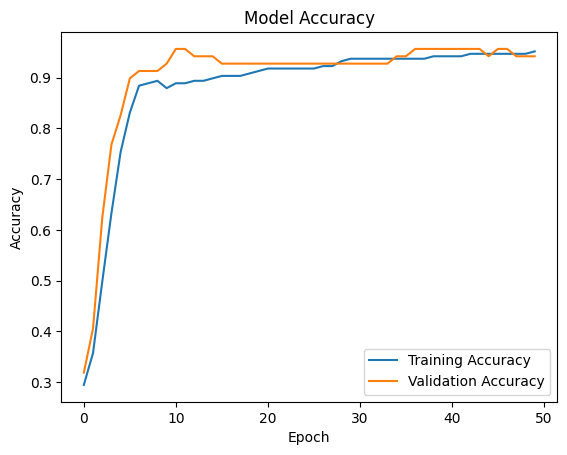

In [378]:
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

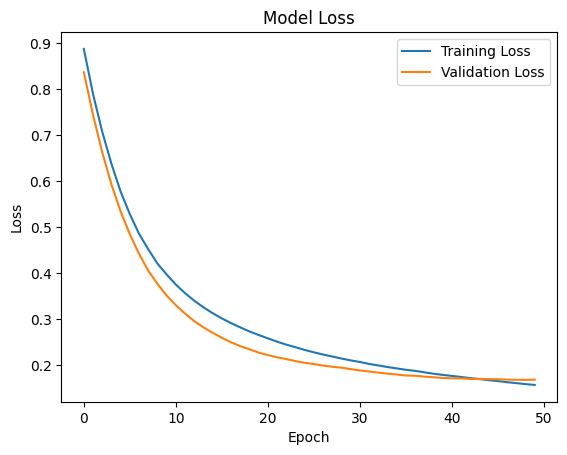

In [379]:
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Let's break down the output:**

1. Epochs and Batches: Each epoch consists of a certain number of batches. In this case, each epoch processes 6 batches (6/6 in the progress report). The number of batches can vary depending on the dataset size and the specified batch_size during model training.
2. Training Progress: For each epoch, you can see the training loss and accuracy. The training loss is a measure of how well the model is performing on the training data, and the training accuracy indicates the percentage of correct predictions on the training data.
3. Validation Progress: After each epoch, the model is evaluated on the validation dataset. The validation loss (val_loss) and validation accuracy (val_accuracy) metrics provide insights into how well the model is generalizing to new, unseen data (validation data). This helps in monitoring if the model is overfitting or underfitting during training.
4. Test Accuracy: After training completes, the model's final performance is assessed. The test accuracy indicates how well the model performs on new, unseen data. In the provided results, the test accuracy is 0.9420, which shows good performance on the test dataset.
5. Interpretation: The model's test accuracy is high, suggesting that it generalizes well to new, unseen data.

# PyTorch

In [380]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [381]:
# Convert data to PyTorch tensors
xTrainTensor = torch.tensor(xTrain, dtype=torch.float32)
yTrainTensor = torch.tensor(yTrain.values, dtype=torch.float32)  # Use .values to extract numpy array
xTestTensor = torch.tensor(xTest, dtype=torch.float32)
yTestTensor = torch.tensor(yTest.values, dtype=torch.float32)  # Use .values to extract numpy array

In [382]:
# Define the neural network model
class LungCancerModel(nn.Module):
    def __init__(self, input_size):
        super(LungCancerModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Input size to hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [383]:
# Instantiate the model
input_size = xTrain.shape[1]
model = LungCancerModel(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate

In [384]:
# Lists to store training metrics
train_losses = []
train_accuracies = []

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(xTrainTensor)
    loss = criterion(outputs, yTrainTensor.view(-1, 1))
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        predictions = (outputs >= 0.5).float()
        correct = (predictions == yTrainTensor.view(-1, 1)).float()
        train_accuracy = correct.mean().item()

    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Accuracy: {train_accuracy}')

Epoch 1, Loss: 0.7553094625473022, Accuracy: 0.3285024166107178
Epoch 2, Loss: 0.7444919347763062, Accuracy: 0.34299516677856445
Epoch 3, Loss: 0.7338466048240662, Accuracy: 0.3478260934352875
Epoch 4, Loss: 0.7233722805976868, Accuracy: 0.3719806671142578
Epoch 5, Loss: 0.7130700349807739, Accuracy: 0.4251207709312439
Epoch 6, Loss: 0.7029386758804321, Accuracy: 0.4396135210990906
Epoch 7, Loss: 0.6929803490638733, Accuracy: 0.4637681245803833
Epoch 8, Loss: 0.6832008361816406, Accuracy: 0.5169082283973694
Epoch 9, Loss: 0.6736072301864624, Accuracy: 0.5507246255874634
Epoch 10, Loss: 0.6641960740089417, Accuracy: 0.5893719792366028
Epoch 11, Loss: 0.6549729108810425, Accuracy: 0.6618357300758362
Epoch 12, Loss: 0.6459329724311829, Accuracy: 0.6570048332214355
Epoch 13, Loss: 0.6370757222175598, Accuracy: 0.7149758338928223
Epoch 14, Loss: 0.62839674949646, Accuracy: 0.7246376872062683
Epoch 15, Loss: 0.6198986768722534, Accuracy: 0.7632850408554077
Epoch 16, Loss: 0.611582338809967, 

In [385]:
# Evaluation on test data
model.eval()
with torch.no_grad():
    test_outputs = model(xTestTensor)
    test_loss = criterion(test_outputs, yTestTensor.view(-1, 1))
    predictions = (test_outputs >= 0.5).float()
    accuracy = (predictions == yTestTensor.view(-1, 1)).float().mean().item()

print(f'Test Loss: {test_loss.item()}, Test Accuracy: {accuracy}')

Test Loss: 0.3906172513961792, Test Accuracy: 0.9130434989929199


**Here's a breakdown of the output:**

1. Training Progress:
The training process is carried out for 50 epochs (complete passes through the training data).
For each epoch, the model computes the loss (binary cross-entropy loss) and the accuracy on the training data.
The loss decreases gradually with each epoch, indicating that the model is learning to minimize the error between predicted and true values.
The training accuracy increases over epochs, suggesting that the model is improving its ability to correctly classify training samples.
2. Evaluation on Test Data:
After training, the model is evaluated on the test data to assess its performance on unseen data.
The test loss (binary cross-entropy loss) is computed, which is similar to the training loss, indicating good generalization.
The test accuracy is computed based on predictions made on the test set. The reported test accuracy is 0.9130, indicating the proportion of correctly classified test samples.

# Gaussian Naive Bayes

In [386]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Split data 75/25**

Classification Report Naive Bayes with 75/25 data split: 

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.93      0.98      0.96        56

    accuracy                           0.93        69
   macro avg       0.92      0.84      0.87        69
weighted avg       0.93      0.93      0.92        69

The Accuracy of Gaussian Naive Bayes is 92.75 %



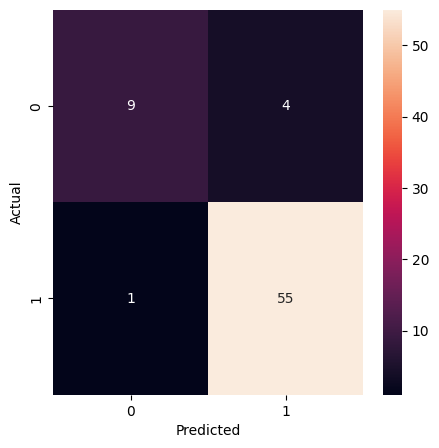

In [387]:
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 75/25 data split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

**Split data 80/20**

Classification Report Naive Bayes with 80/20 data split: 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56

The Accuracy of Gaussian Naive Bayes is 91.07 %



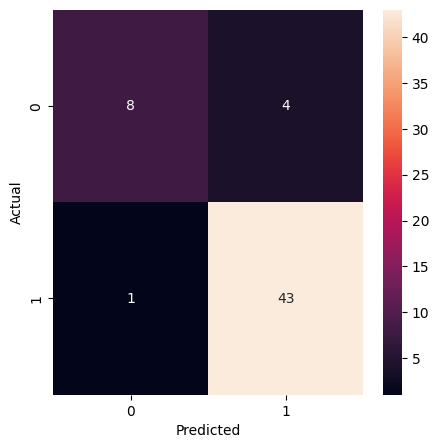

In [388]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 80/20 data split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

**Split data 70/30**

Classification Report Naive Bayes with 70/30 data split: 

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.93      0.97      0.95        70

    accuracy                           0.92        83
   macro avg       0.87      0.79      0.82        83
weighted avg       0.91      0.92      0.91        83

The Accuracy of Gaussian Naive Bayes is 91.57 %



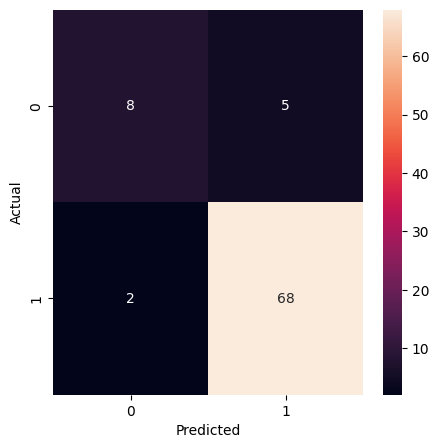

In [389]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 70/30 data split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

**Split data 65/35**

Classification Report Naive Bayes with 65/35 split: 

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.94      0.95      0.95        83

    accuracy                           0.91        97
   macro avg       0.82      0.80      0.81        97
weighted avg       0.90      0.91      0.91        97

The Accuracy of Gaussian Naive Bayes is 90.72 %



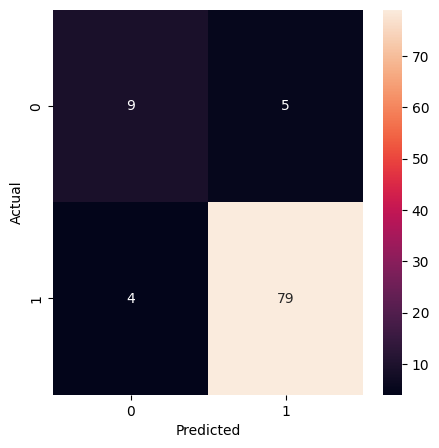

In [390]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.35, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 65/35 split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

# Logistic Regression

In [391]:
from sklearn.linear_model import LogisticRegression

**Split data 75/25**

Classification Report Logistic Regression (75/25 split): 

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.90      1.00      0.95        56

    accuracy                           0.91        69
   macro avg       0.95      0.77      0.82        69
weighted avg       0.92      0.91      0.90        69

The Accuracy of Logistic Regression is 91.3 %



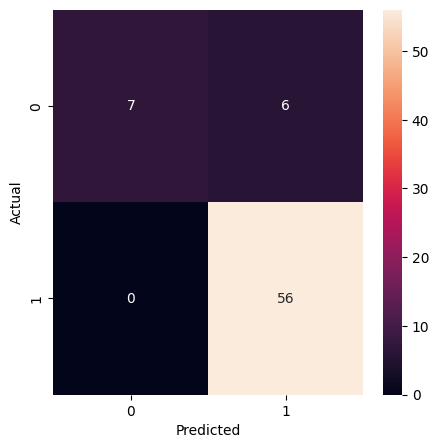

In [392]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (75/25 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")

**Split data 80/20**

Classification Report Logistic Regression (80/20 split): 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56

The Accuracy of Logistic Regression is 92.86 %



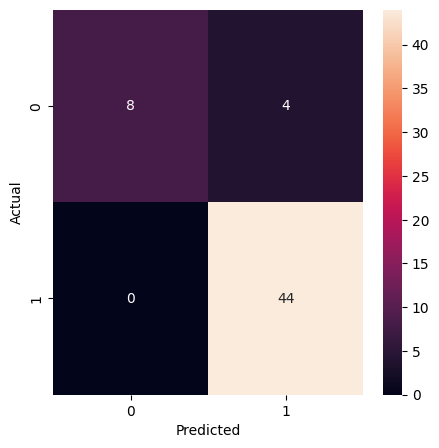

In [393]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=42)

logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (80/20 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")


**Split data 70/30**

Classification Report Logistic Regression (70/30 split): 

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.90      1.00      0.95        70

    accuracy                           0.90        83
   macro avg       0.95      0.69      0.75        83
weighted avg       0.91      0.90      0.88        83

The Accuracy of Logistic Regression is 90.36 %



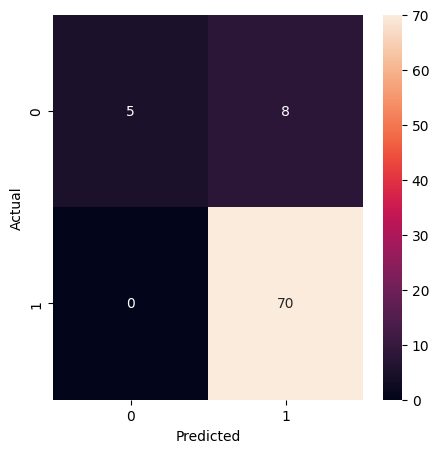

In [394]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=42)

logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (70/30 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")

**Split data 65/35**

Classification Report Logistic Regression (65/35 split): 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.95      0.95      0.95        83

    accuracy                           0.92        97
   macro avg       0.83      0.83      0.83        97
weighted avg       0.92      0.92      0.92        97

The Accuracy of Logistic Regression is 91.75 %



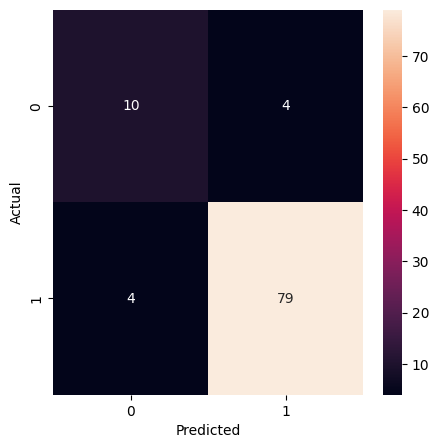

In [395]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.35, random_state=42)

logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (65/35 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")

All sort of accuracy, f1score...etc, see explaination here: https://towardsdatascience.com/the-f1-score-bec2bbc38aa6



Since the F1 score is an average of Precision and Recall, it means that the F1 score gives equal weight to Precision and Recall:

A model will obtain a high F1 score if both Precision and Recall are high
A model will obtain a low F1 score if both Precision and Recall are low
A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high